# Elbow Method and Silhouette Score Method

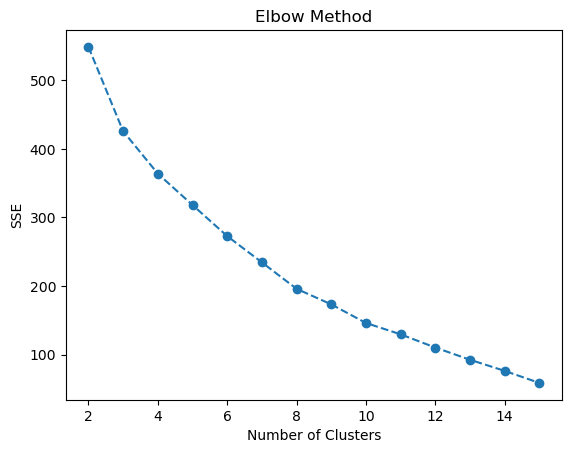

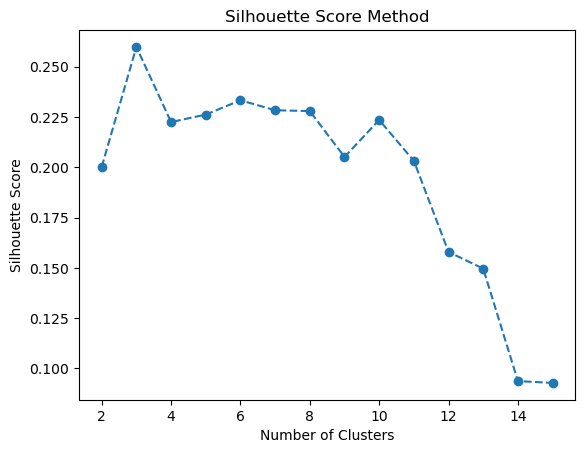

In [16]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# data
df = pd.read_csv('bioactivity_data.csv')
smiles = df['Smiles']
ic50_values = df['IC50']
data['pIC50'] = -np.log10(data['IC50'] * 1e-9)
pic50_standardized = StandardScaler().fit_transform(np.array(pic50_values).reshape(-1, 1))

# Generate fingerprints
fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), 2, nBits=1024) for smi in smiles]
fp_matrix = [list(fp) for fp in fps]

# Combine fingerprints and standardized pIC50 values
combined_data = [fp + list(pic50) for fp, pic50 in zip(fp_matrix, pic50_standardized)]

# Determine optimal number of clusters using Elbow Method and Silhouette Score Method
sse = []
silhouette_scores = []
max_clusters = 15  # You can change this based on your expectation
for num_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(combined_data)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(combined_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow Method
plt.figure()
plt.plot(range(2, max_clusters+1), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.savefig('elbow1.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot Silhouette Score Method
plt.figure()
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.savefig('elbow.png', dpi=300, bbox_inches='tight')
plt.show()


# compound clustering

Silhouette Score: 0.26

Cluster 1:
(-)-maackiain-3-O-glucoside 
(+-)-flavanone
(+)-taxifolin
(E)-Resveratrol
Catechin
Cyanidin
Delphinidin 3-glucoside
Epicatechin 3-gallate
Kaempferol
Kaempferol 3-galactoside
Quercetin 3-rutinoside 

Cluster 2:
Ginsenoside Rh4
Ginsenoside C
Ginsenoside A2
Ginsenoside B2

Cluster 3:
Hederagenin
Olean-12-en-28-oic acid
Oleanolic acid
Phytosterol
Ursolic acid
Eleutheroside M


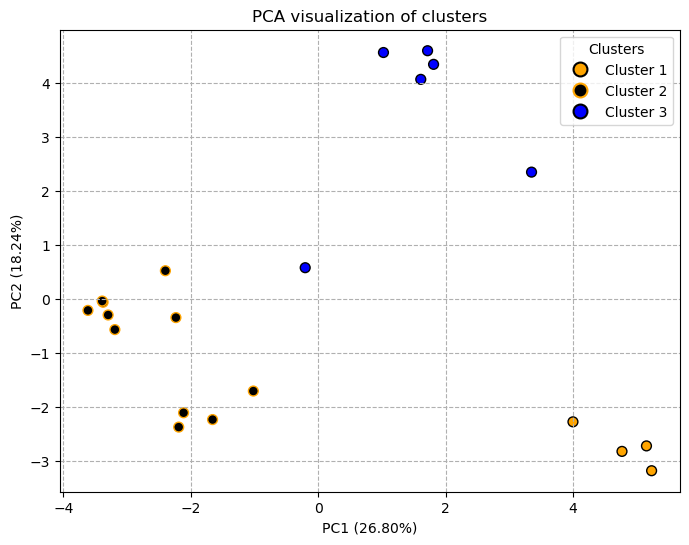

In [17]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# data
df = pd.read_csv('bioactivity_data.csv')
smiles = df['Smiles']
ic50_values = df['IC50']
data['pIC50'] = -np.log10(data['IC50'] * 1e-9)
pic50_standardized = StandardScaler().fit_transform(np.array(pic50_values).reshape(-1, 1))

# Generate fingerprints
fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), 2, nBits=1024) for smi in smiles]
fp_matrix = [list(fp) for fp in fps]

# Combine fingerprints and standardized pIC50 values 
combined_data = [fp + list(pic50) for fp, pic50 in zip(fp_matrix, pic50_standardized)]

# K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(combined_data)

# Evaluate clustering
labels = kmeans.labels_
silhouette_avg = silhouette_score(combined_data, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Visualize using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(combined_data)

# Extracting explained variance
explained_variance = pca.explained_variance_ratio_

colors = []
for label in labels:
    if label == 0:
        colors.append('black')
    elif label == 1:
        colors.append('orange')
    else:
        colors.append('blue')

edge_colors = []
for color in colors:
    if color == 'black':
        edge_colors.append('orange')
    else:
        edge_colors.append('black')


# Output names corresponding to each cluster
clustered_names = df.groupby(labels)['Name'].apply(list)

for cluster, names in clustered_names.items():
    print(f"\nCluster {cluster + 1}:")
    for name in names:
        print(name)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors, edgecolors=edge_colors, s=50, linewidth=1)
plt.title('PCA visualization of clusters')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.grid(linestyle='--')

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster 1', markersize=10, markerfacecolor='orange', markeredgewidth=1.5, markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='w', label='Cluster 2', markersize=10, markerfacecolor='black', markeredgewidth=1.5, markeredgecolor='orange'),
                   Line2D([0], [0], marker='o', color='w', label='Cluster 3', markersize=10, markerfacecolor='blue', markeredgewidth=1.5, markeredgecolor='black')]

plt.legend(handles=legend_elements, title="Clusters", loc='upper right')
plt.savefig('cluster.png', dpi=300, bbox_inches='tight')
plt.show()


# Descriptive statistics Representativeness of compounds

In [18]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

# Descriptive Statistics_Calculate descriptive statistics for pIC50 for each cluster, such as mean, median, standard deviation
df['Cluster'] = labels
df_grouped = df.groupby('Cluster')['IC50'].describe()
print(df_grouped)

# 2. Representativeness of compounds_Select the compound closest to the cluster center in each cluster as a representative
cluster_centers = kmeans.cluster_centers_
representatives = {}

for i, center in enumerate(cluster_centers):
    distances = np.linalg.norm(combined_data - center, axis=1)
    cluster_data = df[df['Cluster'] == i]
    median_index = cluster_data.iloc[np.argsort(distances)[len(distances)//2]].name
    representatives[i] = df.loc[median_index, 'Name']

print(representatives)

# Descriptor-based analysis of structural differences between clusters
from rdkit.Chem import Descriptors

# Calculate molecular weight for all compounds
df['MolWt'] = df['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))

# Compare the distribution of molecular weights across clusters
grouped = df.groupby('Cluster')['MolWt'].describe()
print(grouped)

         count        mean        std   min   25%   50%    75%    max
Cluster                                                              
0          9.0  110.666667  75.301062  41.0  52.0  97.0  111.0  260.0
1         13.0   67.769231  45.308487  16.0  34.0  48.0   95.0  143.0
{0: 'Oleanolic acid', 1: '(+)-taxifolin'}
         count        mean         std      min      25%      50%      75%  \
Cluster                                                                      
0          9.0  720.063889  298.010267  440.712  456.711  620.868  947.166   
1         13.0  388.837692  113.082246  224.259  287.247  442.376  448.380   

              max  
Cluster            
0        1205.392  
1         610.521  


# Heat map: The distribution of fingerprint bits of molecules in different clusters. The darker the color in the heat map, the higher the frequency of the bit in the corresponding cluster.

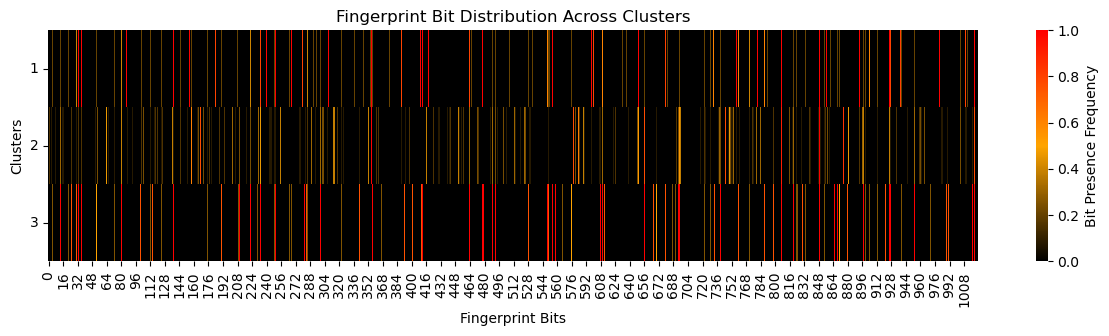

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.colors as mcolors

df = pd.read_csv('bioactivity_data.csv')

# fingerprints
df['Fingerprint'] = df['Smiles'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=1024))

# bits
df['Cluster'] = labels
clusters = df['Cluster'].unique()
bit_frequencies = []

for cluster in clusters:
    cluster_fps = df[df['Cluster'] == cluster]['Fingerprint'].tolist()
    avg_fp = np.mean(cluster_fps, axis=0)
    bit_frequencies.append(avg_fp)

bit_frequencies = np.array(bit_frequencies)

# heat map
plt.figure(figsize=(15, len(clusters)))
colors = ["black", "orange", "red"]
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)

sns.heatmap(bit_frequencies, cmap=cmap, cbar_kws={'label': 'Bit Presence Frequency'})
plt.xlabel("Fingerprint Bits")
plt.ylabel("Clusters")
plt.yticks(ticks=np.arange(0.5, len(clusters)), labels=['1', '2','3'], rotation=0)  # Set the ytick labels to 1 and 2
plt.title("Fingerprint Bit Distribution Across Clusters")
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


# MCS for activity level 

Not enough molecules to compute MCS for activity level Low.


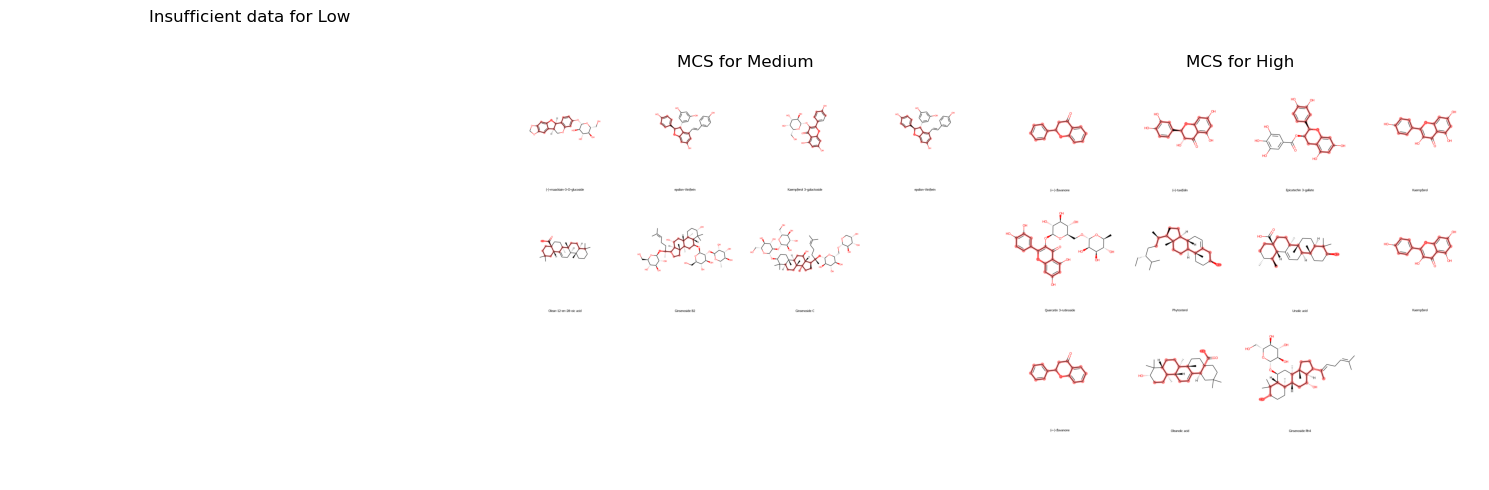

In [52]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS, Draw
import matplotlib.pyplot as plt
from PIL import Image
import io
from IPython.display import display

# Load data
data = pd.read_csv('bioactivity_data.csv')

# Calculate pIC50 and categorize activity
data['pIC50'] = -np.log10(data['IC50'] * 1e-9)
data['Activity_Level'] = pd.cut(data['pIC50'], bins=[-np.inf, 5, 7, np.inf], labels=['Low', 'Medium', 'High'])

activity_levels = ['Low', 'Medium', 'High']

fig, axs = plt.subplots(1, len(activity_levels), figsize=(15, 5), sharex=True, sharey=True)

for ax, level in zip(axs, activity_levels):
    subset = data[data['Activity_Level'] == level]
    subset_mols = [Chem.MolFromSmiles(smiles) for smiles in subset['SMILES']]
    
    if len(subset_mols) > 1:
        mcs = rdFMCS.FindMCS(subset_mols)
        mcs_mol = Chem.MolFromSmarts(mcs.smartsString)

        # Generate high-quality image
        img = Draw.MolsToGridImage(
            subset_mols, 
            molsPerRow=4, 
            subImgSize=(600, 600),  # Increased image size for better quality
            legends=subset['Name'].tolist(), 
            highlightAtomLists=[mol.GetSubstructMatch(mcs_mol) for mol in subset_mols],
            useSVG=False
        )

        # Convert to PIL Image for more control over display settings
        img_pil = Image.open(io.BytesIO(img.data))
        
        # Display and save image
        ax.imshow(img_pil)
        ax.axis('off')
        ax.set_title(f'MCS for {level}')
        
        # Save with high dpi
        img_pil.save(f"MCS_{level}.png", dpi=(400, 400))
    else:
        print(f"Not enough molecules to compute MCS for activity level {level}.")
        ax.axis('off')
        ax.set_title(f'Insufficient data for {level}')

plt.tight_layout()
plt.show()


# Calculate pIC50 and categorize activity

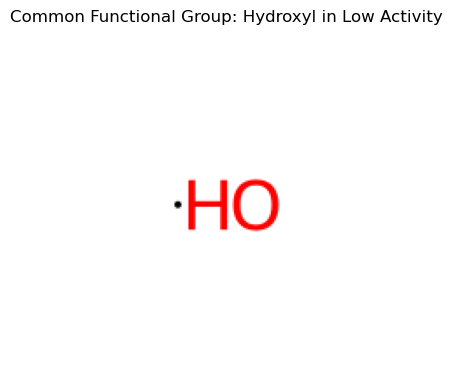

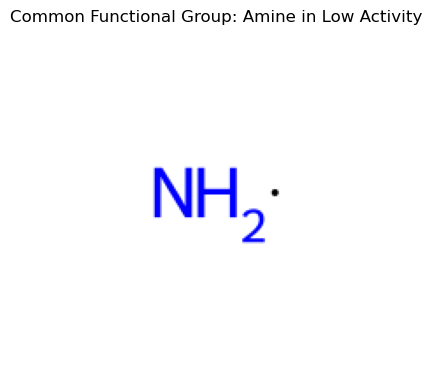

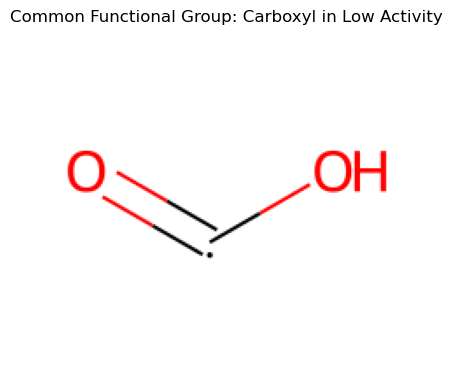

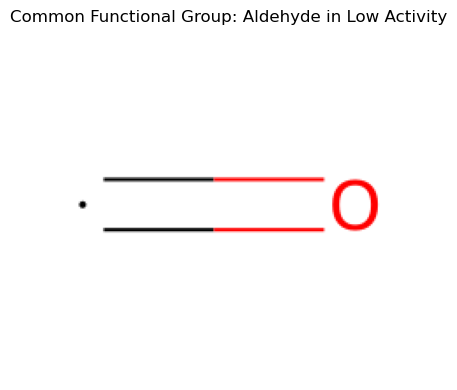

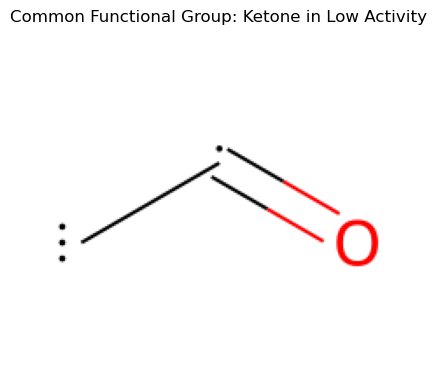

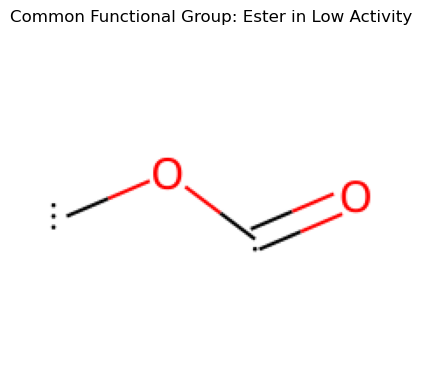

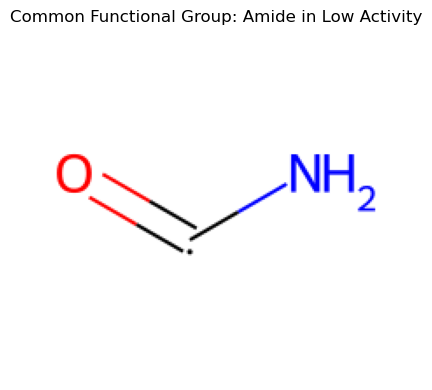

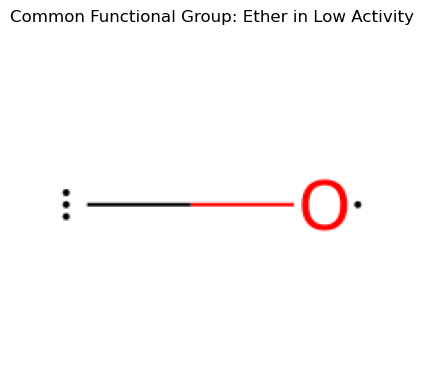

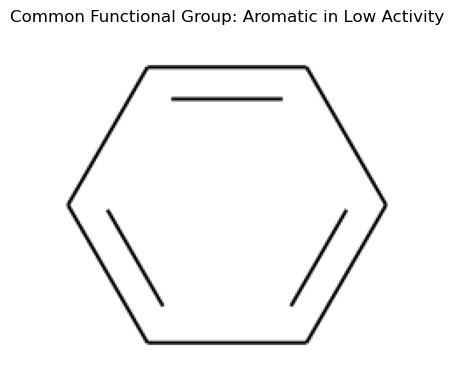

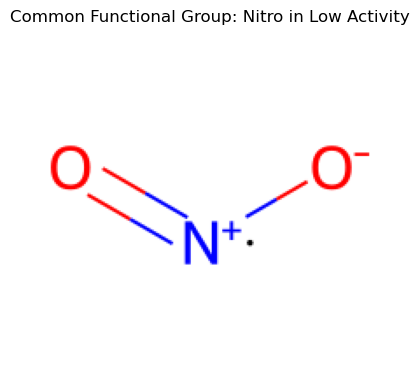

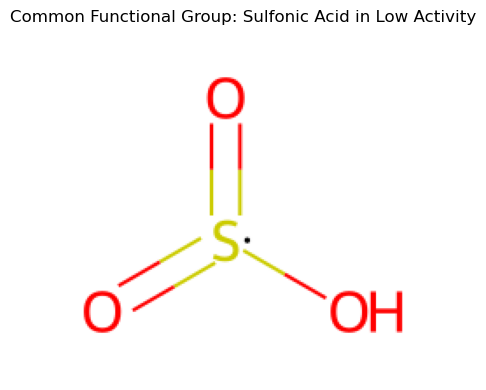

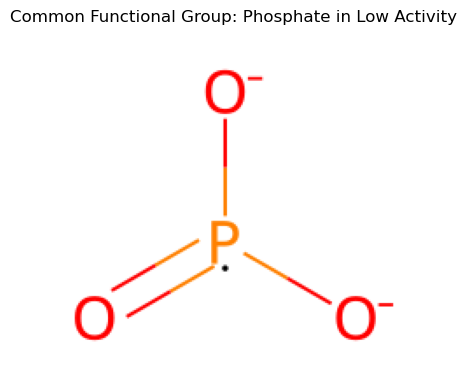

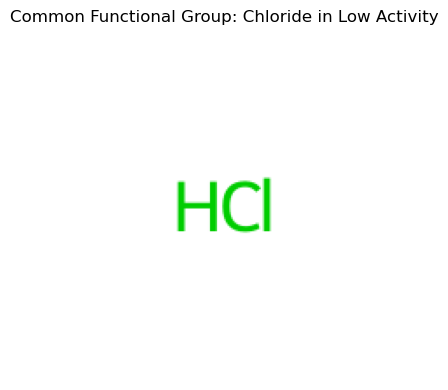

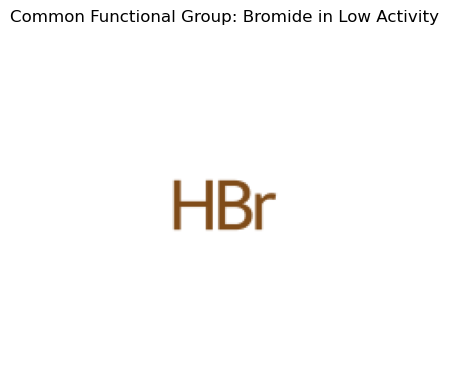

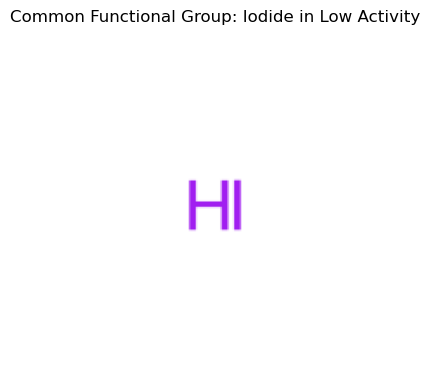

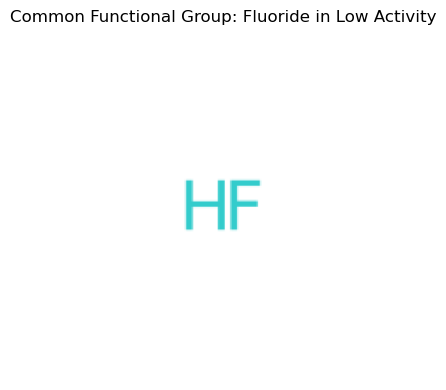

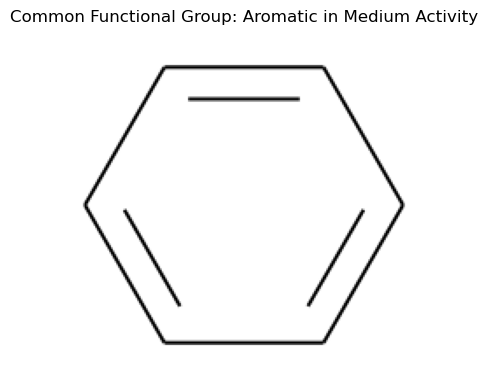

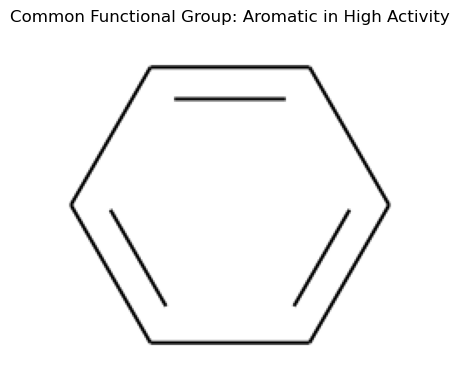

In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor
import matplotlib.pyplot as plt
# Load data
data = pd.read_csv('bioactivity_data.csv')

# Calculate pIC50 and categorize activity
data['pIC50'] = -np.log10(data['IC50'] * 1e-9)
data['Activity_Level'] = pd.cut(data['pIC50'], bins=[-np.inf, 5, 7, np.inf], labels=['Low', 'Medium', 'High'])
data['Activity_Level'] = pd.Categorical(data['Activity_Level'], categories=['Low', 'Medium', 'High'], ordered=True)
activity_levels = ['Low', 'Medium', 'High']

functional_groups = {
   'Hydroxyl': '[OH]',
    'Amine': '[NH2]',
    'Carboxyl': '[C](=O)[OH]',
    'Aldehyde': '[CH]=O',
    'Ketone': '[C](=O)[C]',
    'Ester': '[C](=O)[O][C]',
    'Amide': '[C](=O)[NH2]',
    'Ether': '[O][C]',
    'Aromatic': 'c1ccccc1',
    'Nitro': '[N+](=O)[O-]',
    'Sulfonic Acid': '[S](=O)(=O)[OH]',
    'Phosphate': '[P](=O)([O-])[O-]',
    'Chloride': 'Cl',
    'Bromide': 'Br',
    'Iodide': 'I',
    'Fluoride': 'F',
}

for level in activity_levels:
    subset = data[data['Activity_Level'] == level]
    subset_mols = [Chem.MolFromSmiles(smiles) for smiles in subset['SMILES']]

    # Dictionary to hold counts of each functional group
    fg_counts = {}

    # Count how many molecules have each functional group
    for fg_name, fg_smiles in functional_groups.items():
        fg_mol = Chem.MolFromSmiles(fg_smiles)
        count = sum([1 for mol in subset_mols if mol.HasSubstructMatch(fg_mol)])
        fg_counts[fg_name] = count

    # Filter functional groups that are present in the majority of the molecules
    threshold = len(subset_mols) * 0.5
    common_fgs = {k: v for k, v in fg_counts.items() if v >= threshold}

    # Draw common functional groups
    for fg_name in common_fgs.keys():
        fg_smiles = functional_groups[fg_name]
        fg_mol = Chem.MolFromSmiles(fg_smiles)

        img = Draw.MolToImage(fg_mol, size=(200, 200))
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Common Functional Group: {fg_name} in {level} Activity")
        plt.tight_layout()
        plt.savefig(f"Functional_Group_{fg_name}_{level}_Activity.png", dpi=400)
        plt.show()

# t test

In [9]:
import pandas as pd
from rdkit import Chem
from scipy.stats import ttest_ind

data = pd.read_csv('bioactivity_data.csv')

non_string_smiles = data['SMILES'].apply(lambda x: not isinstance(x, str))

if non_string_smiles.sum() > 0:
    print("Non-string SMILES entries found:")
    print(data[non_string_smiles])
    
    # data = data[~non_string_smiles]  
    data.loc[non_string_smiles, 'SMILES'] = '' 

# SMILES
substructures_smiles = {
    'Aromatic': 'c1ccccc1',
}

# substructure checking
for sub_name, sub_smiles in substructures_smiles.items():
    sub_mol = Chem.MolFromSmiles(sub_smiles)
    data[sub_name] = data['SMILES'].apply(lambda x: Chem.MolFromSmiles(x).HasSubstructMatch(sub_mol))

for substructure in substructures_smiles.keys():
    presence = data[data[substructure] == True]['IC50']
    absence = data[data[substructure] == False]['IC50']
    
    print(f"Average IC50 with {substructure}: {presence.mean():.2f} um")
    print(f"Average IC50 without {substructure}: {absence.mean():.2f} um")
    
    # t test
    t_stat, p_value = ttest_ind(presence, absence)
    print(f"t-test for {substructure}: t = {t_stat:.2f}, p = {p_value:.4f}")
    print("------")


Non-string SMILES entries found:
   IC50 Name SMILES
6   NaN  NaN    NaN
7   NaN  NaN    NaN
Average IC50 with Aromatic: 100.67 um
Average IC50 without Aromatic: nan um
t-test for Aromatic: t = nan, p = nan
------


# pIC50 distribution across activity levels

Activity_Level
Low            NaN
Medium    6.810724
High      7.279810
Name: pIC50, dtype: float64

Activity Level: Low

Activity Level: Medium
(-)-maackiain-3-O-glucoside
epsilon-Viniferin
Kaempferol 3-galactoside
epsilon-Viniferin
Olean-12-en-28-oic acid
Ginsenoside B2
Ginsenoside C

Activity Level: High
(+-)-flavanone
(+)-taxifolin
Epicatechin 3-gallate
Kaempferol
Quercetin 3-rutinoside
Phytosterol
Ursolic acid
Kaempferol
(+-)-flavanone
Oleanolic acid
Ginsenoside Rh4


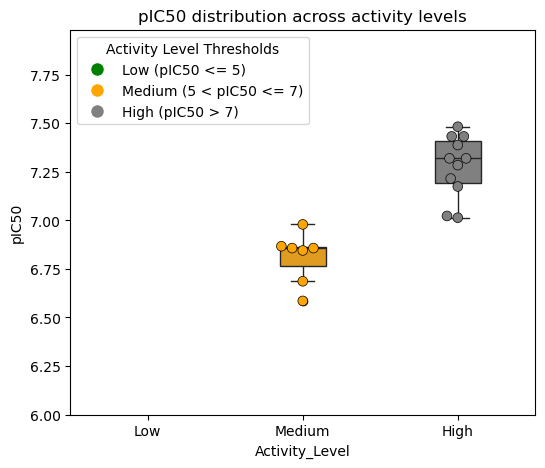

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('bioactivity_data.csv')

# Calculate pIC50 and categorize activity
data['pIC50'] = -np.log10(data['IC50'] * 1e-9)
data['Activity_Level'] = pd.cut(data['pIC50'], bins=[-np.inf, 5, 7, np.inf], labels=['Low', 'Medium', 'High'])

# Ensure Activity_Level column is interpreted as an ordered categorical variable
data['Activity_Level'] = pd.Categorical(data['Activity_Level'], categories=['Low', 'Medium', 'High'], ordered=True)

# Descriptive statistics
mean_pIC50 = data.groupby('Activity_Level')['pIC50'].mean()
print(mean_pIC50)

# Get names for each activity level
names_by_activity = data.groupby('Activity_Level')['Name'].apply(list)

for activity_level, names in names_by_activity.items():
    print(f"\nActivity Level: {activity_level}")
    for name in names:
        print(name)

# Visualization
plt.figure(figsize=(6, 5))  # Reduced the width

# Use distinct colors for activity levels
palette = {'Low': 'green', 'Medium': 'orange', 'High': 'gray'}

# Add boxplot
sns.boxplot(x='Activity_Level', y='pIC50', data=data, palette=palette, hue='Activity_Level', dodge=False, width=0.3)

# Add swarmplot, ensuring point colors match boxplot
sns.swarmplot(x='Activity_Level', y='pIC50', data=data, size=7, edgecolor='black', linewidth=0.5, palette=palette, hue='Activity_Level')

# Setting title and legend
plt.title('pIC50 distribution across activity levels')
plt.ylim([6.0, data['pIC50'].max() + 0.5])

# Add category thresholds to legend
legend_labels = [f"Low (pIC50 <= 5)", f"Medium (5 < pIC50 <= 7)", f"High (pIC50 > 7)"]
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_label, 
                      markersize=10, markerfacecolor=palette[activity_level])
           for activity_level, legend_label in zip(['Low', 'Medium', 'High'], legend_labels)]

# Set legend at the top-left inside the plot
plt.legend(handles=handles, title="Activity Level Thresholds", loc='upper left')

plt.savefig('level.png', dpi=300, bbox_inches='tight')
plt.show()


# Structure-Activity Relationship

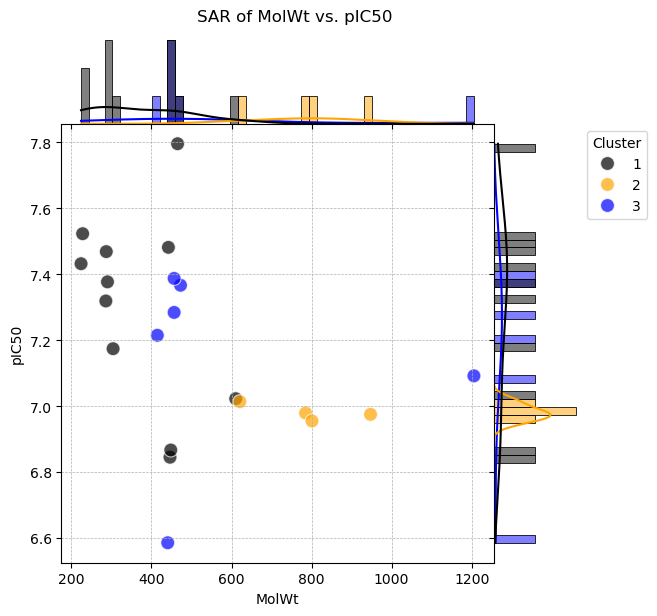

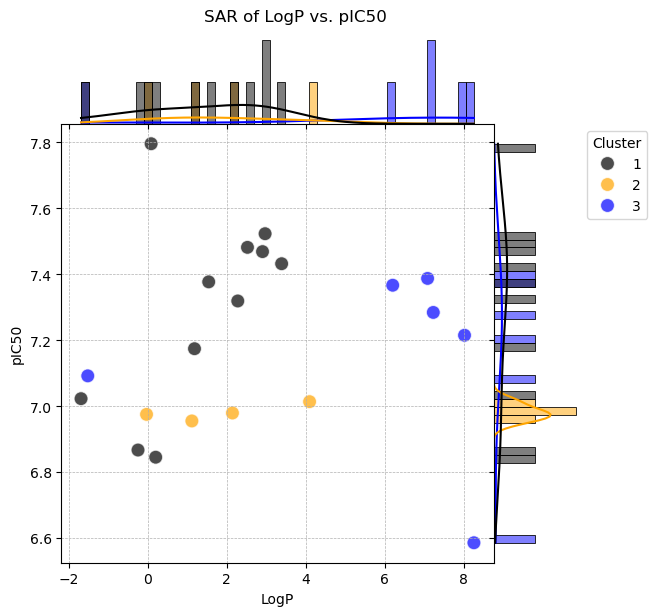

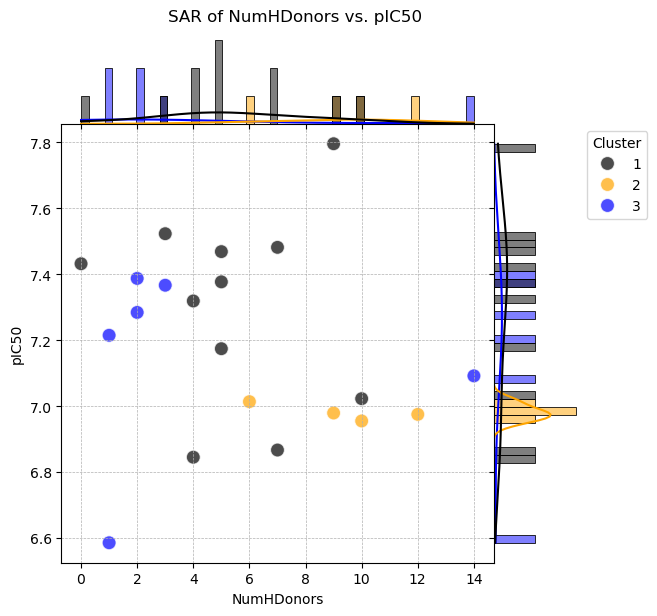

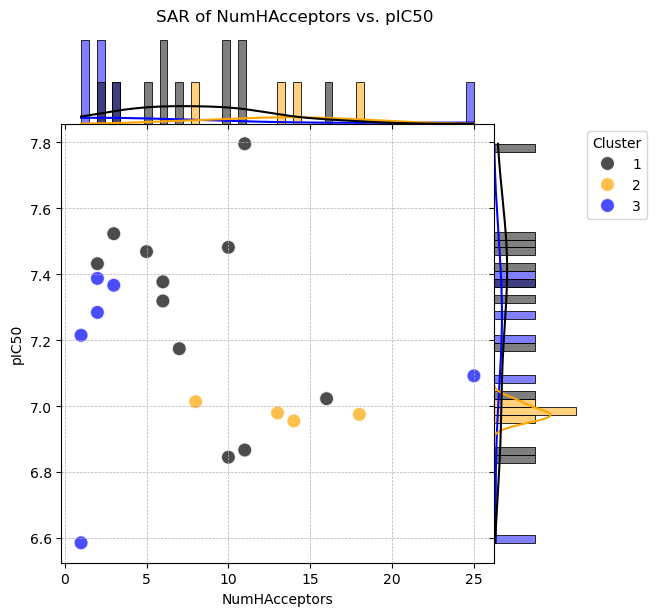

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors

# Load data
df = pd.read_csv('bioactivity_data.csv')

# matches the length of dataframe
df['Cluster'] = labels + 1  

# Compute descriptors
df['Mol'] = df['Smiles'].apply(Chem.MolFromSmiles)
df['MolWt'] = df['Mol'].apply(Descriptors.MolWt)
df['LogP'] = df['Mol'].apply(Descriptors.MolLogP)
df['NumHDonors'] = df['Mol'].apply(Descriptors.NumHDonors)
df['NumHAcceptors'] = df['Mol'].apply(Descriptors.NumHAcceptors)

# Define palette
palette = {1: "black", 2: "orange", 3: "blue"}

# Visualize relationship between descriptors and activity
descriptors = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']
for descriptor in descriptors:
    g = sns.JointGrid(data=df, x=descriptor, y='pIC50', hue='Cluster', space=0, palette=palette)
    g = g.plot_joint(sns.scatterplot, s=100, alpha=0.7)
    g = g.plot_marginals(sns.histplot, bins=50, kde=True)
    
    handles, _ = g.ax_joint.get_legend_handles_labels()
    g.ax_joint.legend(handles, ["1", "2", "3"], title="Cluster", loc='upper left', bbox_to_anchor=(1.2,1))

    g.ax_joint.grid(True, linestyle="--", linewidth=0.5)
    g.fig.suptitle(f'SAR of {descriptor} vs. pIC50', y=1.02)
    plt.savefig(f'SAR_{descriptor}.png', dpi=300, bbox_inches='tight')
    plt.show()


# Functional Group

Not enough molecules to compute MCS for activity level Low.


<Figure size 600x600 with 0 Axes>

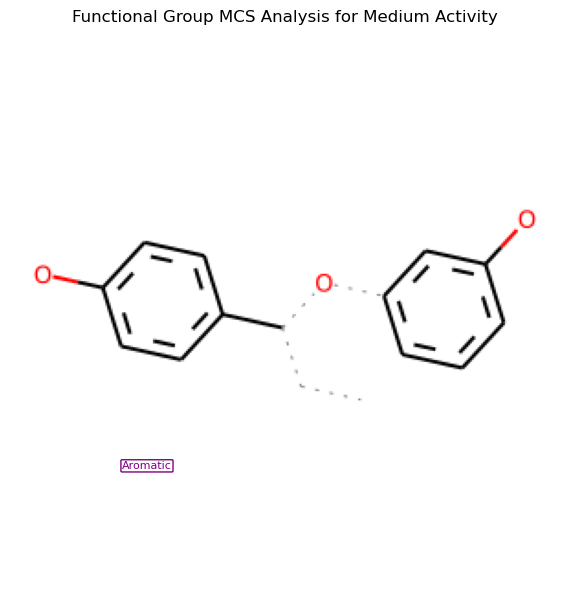

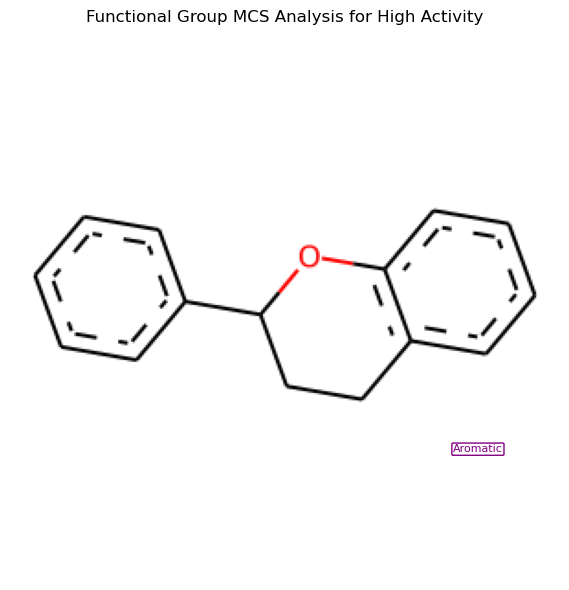

In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS, Draw, rdDepictor
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = pd.read_csv('bioactivity_data.csv')

# Calculate pIC50 and categorize activity
data['pIC50'] = -np.log10(data['IC50'] * 1e-9)
data['Activity_Level'] = pd.cut(data['pIC50'], bins=[-np.inf, 5, 7, np.inf], labels=['Low', 'Medium', 'High'])
data['Activity_Level'] = pd.Categorical(data['Activity_Level'], categories=['Low', 'Medium', 'High'], ordered=True)
activity_levels = ['Low', 'Medium', 'High']

# Define functional groups and their SMILES representation
functional_groups = {
   'Hydroxyl': '[OH]',
    'Amine': '[NH2]',
    'Carboxyl': '[C](=O)[OH]',
    'Aldehyde': '[CH]=O',
    'Ketone': '[C](=O)[C]',
    'Ester': '[C](=O)[O][C]',
    'Amide': '[C](=O)[NH2]',
    'Ether': '[O][C]',
    'Aromatic': 'c1ccccc1',
    'Nitro': '[N+](=O)[O-]',
    'Sulfonic Acid': '[S](=O)(=O)[OH]',
    'Phosphate': '[P](=O)([O-])[O-]',
    'Chloride': 'Cl',
    'Bromide': 'Br',
    'Iodide': 'I',
    'Fluoride': 'F',
}

for level in activity_levels:
    plt.figure(figsize=(6, 6))
    subset = data[data['Activity_Level'] == level]
    subset_mols = [Chem.MolFromSmiles(smiles) for smiles in subset['SMILES']]

    if len(subset_mols) > 1:  
        mcs = rdFMCS.FindMCS(subset_mols)
        mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
        
        rdDepictor.Compute2DCoords(mcs_mol)
        
        img = Draw.MolToImage(mcs_mol, size=(300, 300), kekulize=True)
        plt.imshow(img)
        plt.title(f"Functional Group MCS Analysis for {level} Activity")
        
        conf = mcs_mol.GetConformer()
        xs = [conf.GetAtomPosition(i).x for i in range(mcs_mol.GetNumAtoms())]
        ys = [conf.GetAtomPosition(i).y for i in range(mcs_mol.GetNumAtoms())]
        
        scale = 300 / (max(xs) - min(xs))
        
        for fg_name, fg_smiles in functional_groups.items():
            fg_mol = Chem.MolFromSmiles(fg_smiles)
            match_atoms = mcs_mol.GetSubstructMatch(fg_mol)
            
            if match_atoms:
                avg_x = np.mean([xs[i] for i in match_atoms])
                avg_y = np.mean([ys[i] for i in match_atoms])
                
                avg_x = (avg_x - min(xs)) * scale
                avg_y = 300 - (avg_y - min(ys)) * scale
                
                plt.text(avg_x, avg_y, fg_name, color='purple', ha='center', fontsize=8, bbox=dict(facecolor='none', edgecolor='purple', boxstyle='round,pad=0.1'))
                
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(f"Functional_Group_MCS_{level}_Activity.png", dpi=400, bbox_inches='tight')
        plt.show()
        
    else:
        print(f"Not enough molecules to compute MCS for activity level {level}.")

# IC50 찾기

In [ ]:
import requests
import pandas as pd

# Load data
try:
    df = pd.read_csv('NC_activity.csv')  # replace with your filename
except FileNotFoundError:
    print("File not found. Please check your filename and path.")
    raise

# Initialize a DataFrame to store bioactivity data
bioactivity_df = pd.DataFrame()

# Loop through CIDs in data
for index, row in df.iterrows():
    cid = str(row['CID'])
    name = row['Name']
    
    print(f"Fetching data for CID {cid}, Name {name}...")
    
    # Construct the URL for the API request
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/assaysummary/JSON"
    
    # Get the data
    try:
        response = requests.get(url)
        response.raise_for_status()  # check if the request was successful
        data = response.json()
    except requests.RequestException as e:
        print(f"Failed to fetch data for CID {cid}, Name {name}. Error: {str(e)}")
        continue
    
    # Extract relevant information
    try:
        bioactivity_data = data['Table']['Row']
        temp_df = pd.DataFrame(bioactivity_data)
        temp_df['Name'] = name  # add a column with the compound name
        temp_df['CID'] = cid    # add a column with the CID
        
        # Append to the main DataFrame
        bioactivity_df = pd.concat([bioactivity_df, temp_df], ignore_index=True)
    except KeyError:
        print(f"No bioactivity data found for CID {cid}, Name {name}.")
        continue
    
    print(f"Data fetched for CID {cid}, Name {name}.")
    
# Save the bioactivity data to a CSV file
bioactivity_df.to_csv('bioactivity_data.csv', index=False)
print("Bioactivity data saved to bioactivity_data.csv.")
